In [4]:
library(ggplot2)
library(tidyverse)
library(data.table)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



In [5]:
options(repr.plot.width = 2, repr.plot.height = 2, repr.plot.res = 200)
theme_set(theme_bw())
theme_update(
    panel.background=element_blank(),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    )

# Poisson

A poisson PMF is 
$\frac{e^{-\lambda}\lambda^{x}}{x!}$

In [43]:
pois_pmf <- function(x, lambda) {
    exp(-lambda)*lambda^(x)/factorial(x)
}

Using the dpois function:

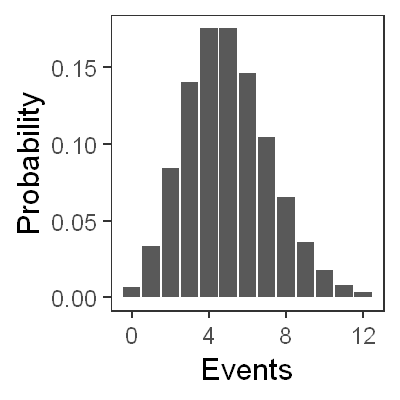

In [24]:
df = tibble(Probability=dpois(x = 0:12, lambda = 5), Events=0:12)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity")

Using the PMF to get the probability of each number of events happening:

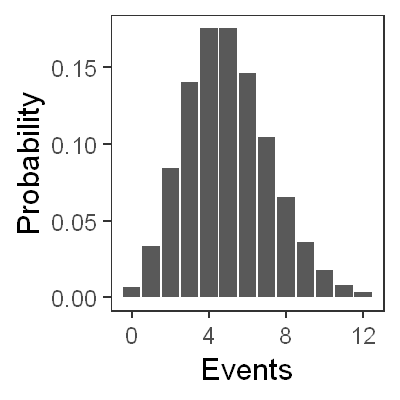

In [33]:
events = 0:12
probs <- sapply(events, pois_pmf, lambda=5)

df = tibble(Probability=probs, Events=events)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity")

Notes:
- We can see that PMF take the number events and output the probability of that many events happening given the assumed model (here a poisson model)

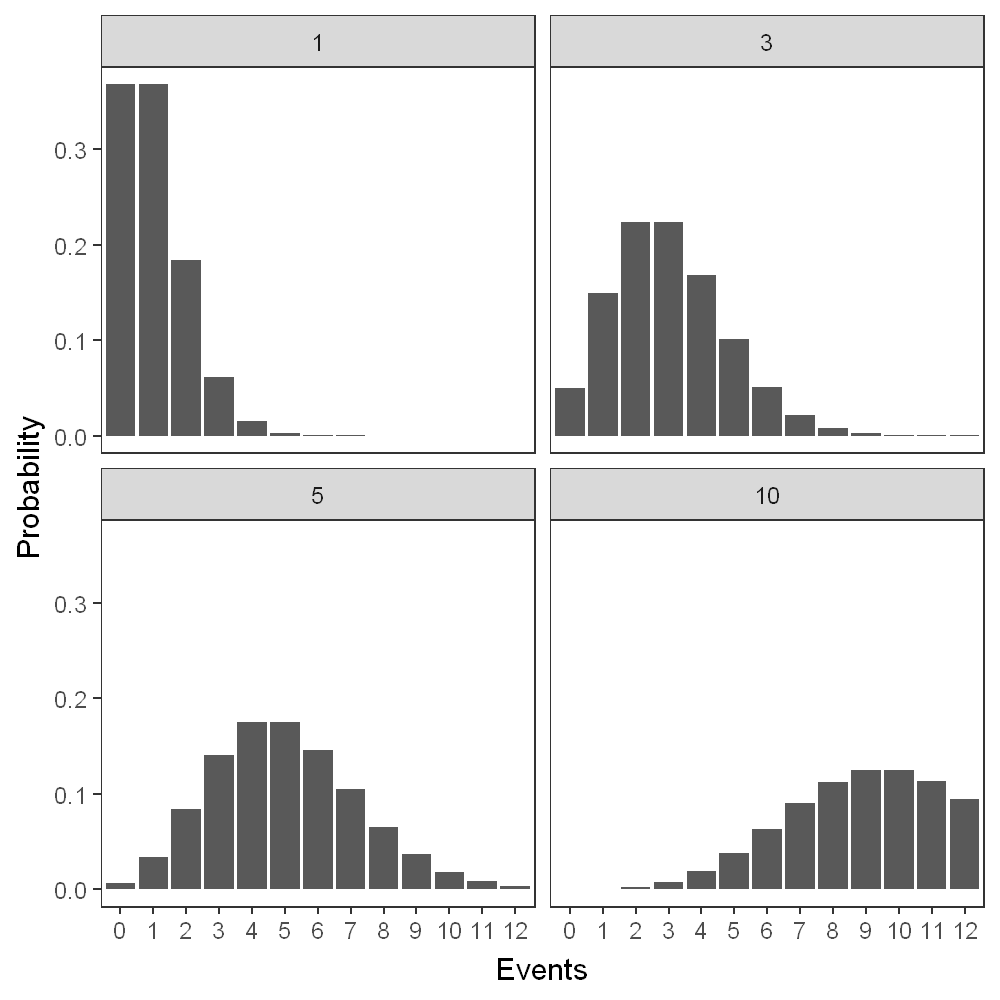

In [73]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

events = 0:12
lambdas = c(1, 3, 5, 10)

probs <- sapply(lambdas, function(y) sapply(events, pois_pmf, lambda=y, simplify = TRUE))
colnames(probs) <- lambdas
rownames(probs) <- events

probs <- probs %>% as_tibble(rownames = "Events")
df <- melt(probs, id.vars = "Events",variable.name = "Lambda", value.name = "Probability")
df$Events <- factor(df$Events, levels=events)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity") +
  facet_wrap(vars(Lambda))

Notes:
- Larger lambda makes distribution more symmetric
  - So, when we expect larger number of events, we can also expect a more bell-shaped variance around the mean
  - This is especially, but not only, due to counts/events being >= 0.

# Binomial

In [2]:
dbinom(x = 3, size = 20, prob = 0.5)

[1] 0.1171875

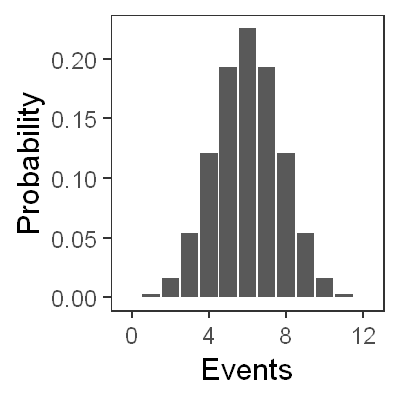

In [7]:
df = tibble(Probability=dbinom(x = 0:12, size = 12, prob = 0.5), Events=0:12)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity")

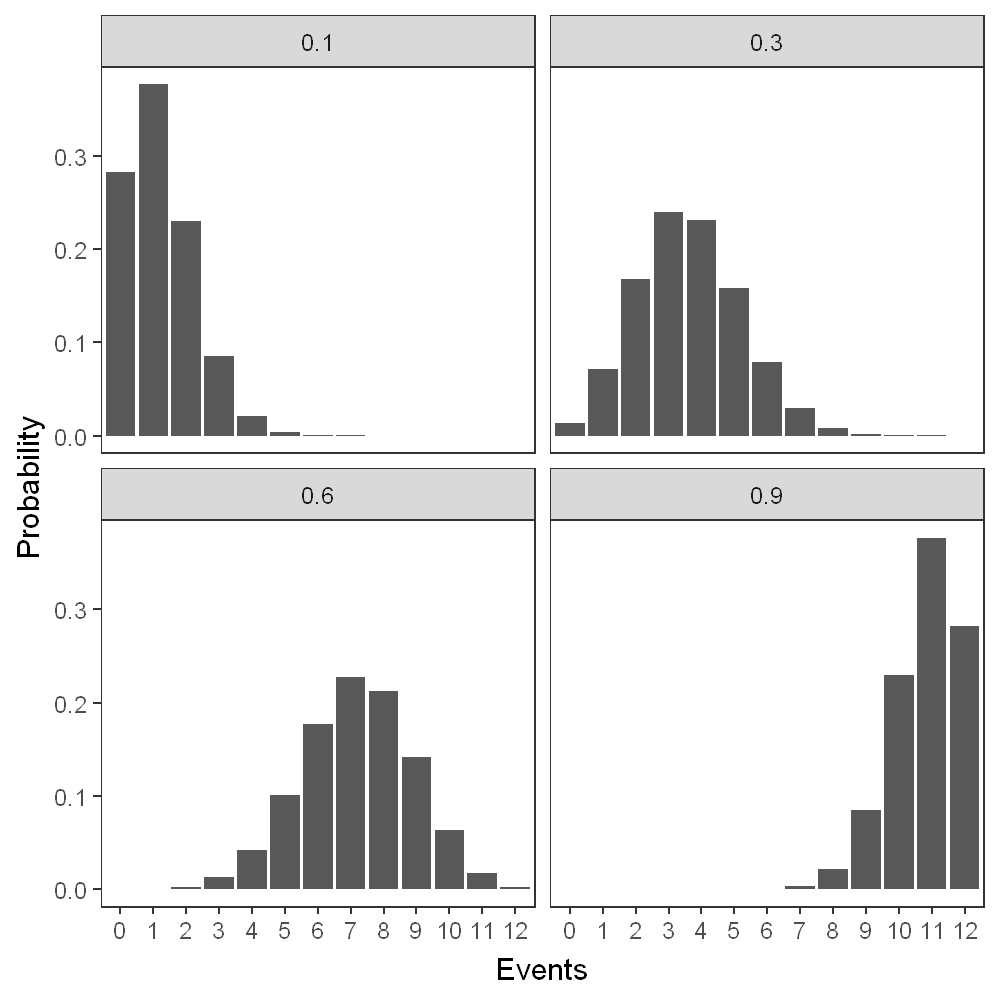

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

events = 0:12
probs_binom = c(0.1, 0.3, 0.6, 0.9)

probs <- sapply(probs_binom, function(y) sapply(events, dbinom, prob=y, size=12, simplify = TRUE))
colnames(probs) <- probs_binom
rownames(probs) <- events

probs <- probs %>% as_tibble(rownames = "Events")
df <- melt(probs, id.vars = "Events",variable.name = "Prob_Success", value.name = "Probability")
df$Events <- factor(df$Events, levels=events)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity") +
  facet_wrap(vars(Prob_Success))